<h1> <center> Crop Recommendation System

In [19]:
#importing the necessary files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#reading the dataset
df=pd.read_csv(r"C:\Users\angsh\OneDrive\Desktop\Machine Learning Projects\Git Project 01\Dataset\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


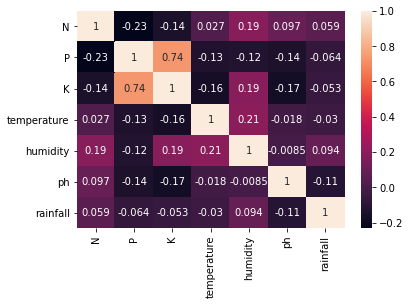

In [6]:
#no missing values
import seaborn as sns
sns.heatmap(df.corr(),annot=True) 

In [9]:
#lets split the dataset
Feature=df.iloc[:,0:-1]
Target=df.label
x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.3,random_state=42)

In [10]:
#lets move to modelling
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [11]:
model=LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [12]:
models,predictions=model.fit(x_train,x_test,y_train,y_test)

  3%|▎         | 1/29 [00:00<00:06,  4.51it/s]C:\Users\angsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\angsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
 14%|█▍        | 4/29 [00:00<00:04,  6.24it/s]C:\Users\angsh\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 

In [13]:
predictions #using lazy predict to see which models perform the best

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.99,0.99,None,0.99,0.02
RandomForestClassifier,0.99,0.99,None,0.99,0.24
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.02
DecisionTreeClassifier,0.99,0.99,None,0.99,0.02
BaggingClassifier,0.99,0.99,None,0.99,0.06
ExtraTreesClassifier,0.98,0.99,None,0.98,0.16
LGBMClassifier,0.98,0.98,None,0.98,1.56
XGBClassifier,0.98,0.98,None,0.98,0.38
LabelSpreading,0.97,0.97,None,0.97,0.13


In [15]:
#Let us consider GaussianNB and RandomForestClassifier	as of now
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
import time


In [17]:
%%time
rf.fit(x_train,y_train)

Wall time: 218 ms


RandomForestClassifier()

In [20]:
rf_pred1=rf.predict(x_test)#testing data prediction
rf_pred2=rf.predict(x_train)#training data prediction
acc1=accuracy_score(rf_pred1,y_test)
acc2=accuracy_score(rf_pred2,y_train)

In [21]:
print(acc1)

0.990909090909091


In [22]:
print(acc2)

1.0


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gb=GaussianNB()


In [25]:
%%time
gb.fit(x_train,y_train)

Wall time: 4.99 ms


GaussianNB()

In [26]:
gb_pred1=gb.predict(x_test)#testing data prediction
gb_pred2=gb.predict(x_train)#training data prediction
acc1=accuracy_score(gb_pred1,y_test)
acc2=accuracy_score(gb_pred2,y_train)

In [27]:
print(acc1)

0.9939393939393939


In [28]:
print(acc2)

0.9954545454545455


In [29]:
#let us save the models
import pickle

In [31]:
#for random forest
rf_file=r'C:\Users\angsh\OneDrive\Desktop\Machine Learning Projects\Git Project 01\Models\randomforest.pkl'
#open the file to save the trained model as pkl
rf_model=open(rf_file,'wb')#we are writing and saving in binary mode
pickle.dump(rf, rf_model) #dumping the model to the file
#closng after writing
rf_model.close()

In [32]:
#for gaussian naive bayes
nb_file=r'C:\Users\angsh\OneDrive\Desktop\Machine Learning Projects\Git Project 01\Models\naivebayes.pkl'
#open the file to save the trained model as pkl
nb_model=open(nb_file,'wb')#we are writing and saving in binary mode
pickle.dump(gb, nb_model) #dumping the model to the file
#closng after writing
nb_model.close()